In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
#Import Dataframe
df_ = pd.read_csv('./WorldImportantDates.csv')

# Size of df
print('Size of df : ' + str(df_.shape))

display(df_.sample(5))

Size of df : (1096, 12)


,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
210,235,SovietUnknownFinnish Winter War,30,November,1939,Russia,Military Conflict,Finland,An attempt by the Soviet Union to annex Finnis...,Finnish and Soviet military,"Joseph Stalin, Soviet military",Negative
222,247,Chernobyl Nuclear Disaster,26,April,1986,USSR,Nuclear Accident,"Chernobyl, Ukraine","The worst nuclear disaster in history, leading...",Global population,Unknown,Negative
627,665,Vietnam War,,Unknown,1955,USA,Military,Vietnam,Controversial conflict that sparked widespread...,American and Vietnamese,Multiple US Administrations,Negative
515,551,Establishment of Simtokha Dzong,Unknown,Unknown,1629,Thimphu,Cultural Development,Thimphu,"The first dzong, combining monastic and milita...",Bhutanese people,Zhabdrung Ngawang Namgyal,Positive
768,806,First Cloned Mammal Unknown Dolly the Sheep,5,July,1996,UK,Scientific,Roslin Institute,Advancement in cloning technology,Scientific community,Ian Wilmut and team,Positive


In [191]:
#Clean the data

#Drop useless column
df_clean = df_.drop('Sl. No', axis=1)

#Change Year column into int
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')

#Drop NaN created for years "BC" (we are not interested in such old years)
df_clean.dropna(subset=['Year'], inplace=True)

#Int type
df_clean['Year'] = df_clean['Year'].astype(int)

#Replace "Unknown" by "-" for the right columns as it seems not recognized
text_columns = ['Name of Incident', 'Country',	'Type of Event', 'Place Name',	'Impact', 'Affected Population', 'Important Person/Group Responsible']
for col in text_columns:
    df_clean[col] = df_clean[col].apply(lambda s : str(s).replace('Unknown', '-'))

#Check we have no more NaN values
print("Count of NaN : ")
print(df_clean.isnull().sum()) #No more NaN values indeed

#Sort by Year
df_sorted = df_clean.sort_values('Year')

#Select only years of the Movie Dataset, 1897 to 2012
start = 1897
end = 2012
df_sorted = df_sorted[df_sorted['Year'] > start-1]
df_sorted = df_sorted[df_sorted['Year'] < end+1]

#Reset the index
df_sorted.reset_index(drop=True, inplace=True)

df = df_sorted

val = 100 * (df.shape[0] / df_.shape[0])
print(f"We are using {val:.2f}% of the dataframe.")


Count of NaN : 
Name of Incident                      0
Date                                  0
Month                                 0
Year                                  0
Country                               0
Type of Event                         0
Place Name                            0
Impact                                0
Affected Population                   0
Important Person/Group Responsible    0
Outcome                               0
dtype: int64
We are using 60.77% of the dataframe.


In [192]:
print("We end up with the resulting dataframe :")
display(df.head(3))
print("...")
display(df.tail(3))

We end up with the resulting dataframe :


,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,Korean Empire Proclaimed,12,October,1897,Korea,Political Change,Korean Peninsula,"King Gojong declared the Korean Empire, assert...",Korean people,Emperor Gojong,Positive
1,Spanish-American War,25,April,1898,Spain/USA,War,"Cuba, Philippines, Puerto Rico, Guam",Spain loses its last colonies in the Americas ...,Spanish and American populations,"Spanish Government, US Government",Negative
2,Spanish-American War,,April,1898,USA,Military,"Cuba, Philippines",Resulted in U.S. acquiring territories and eme...,"Cubans, Filipinos, Americans",William McKinley,Positive


...


,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
663,Hurricane Sandy,29,October,2012,USA,Natural Disaster,East Coast,Devastating hurricane causing extensive damage...,East Coast residents,"Local governments, relief efforts",Negative
664,2012 London Olympics,27,July,2012,UK,Sporting Event,London,Showcased UK on global stage and boosted economy,UK and global visitors,International Olympic Committee,Positive
665,Coup d'état,22,March,2012,Mali,Coup,"Bamako, Mali","Military coup overthrew the government, leadin...",Malians,"Malian soldiers, Amadou Sanogo",Negative


Text(0.5, 0, 'Year')

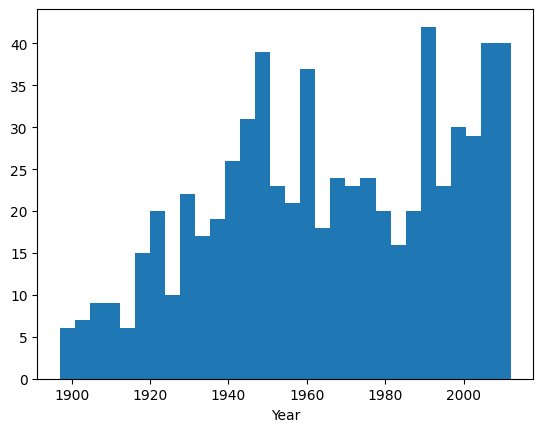

In [188]:
#Lets try to visualize a bit our data
#Histogram of the year
plt.hist(df['Year'], 30)
plt.xlabel('Year')

<Axes: xlabel='Type of Event', ylabel='Country'>

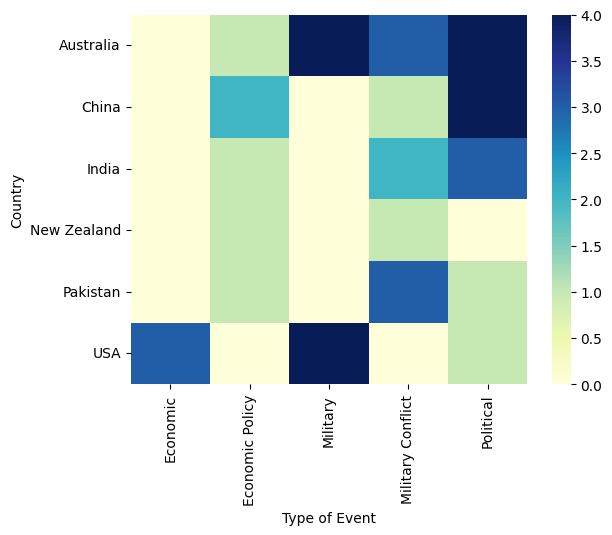

In [189]:
#Which events happen in which country ?
top = 6
#Get the top represented country
top_country = df['Country'].value_counts().head(top)
#Get the top represented type of event
top_event = df['Type of Event'].value_counts().head(top)

df_top = df[df['Country'].isin(top_country.index)]
df_top = df_top[df_top['Type of Event'].isin(top_event.index)]

count_coutry_event = pd.crosstab(df_top['Country'], df_top['Type of Event'])
sns.heatmap(count_coutry_event, cbar=True, cmap='YlGnBu', annot=False)

#IDEA !!! Maybe use word embedding to split the Type of Event into fewer more meaningful categories !!! 

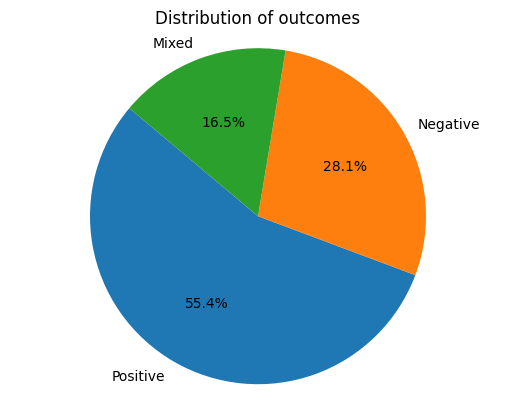

In [190]:
#Whats the distribution of the outcomes ?

outcome_counts = df['Outcome'].value_counts().reset_index()

labels = outcome_counts['Outcome']
count = outcome_counts['count']

# Create the pie chart
plt.pie(count,labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.title('Distribution of outcomes')
plt.axis('equal')
plt.show()